In [1]:
# do this if you use a custom virtual environment to specify the directory to look for installed packages
import sys
import os
## goes back to the project directory
os.chdir("..")
# switch to the name of your virtual environment
kernel_name = ".venv_mp"
sys.path.append("\\".join([os.getcwd(), kernel_name, "Lib\\site-packages"]))

In [5]:
from data_reader import read_data
from node import get_node_data, create_samples
import pandas as pd
import numpy as np

In [3]:
raw_data = read_data()
# nodes = {"pi"+str(i+2):i for i in range(4)}
nodes = ["pi2", "pi3", "pi4", "pi5"]

In [15]:
standardised = True
std_ocsvm_data, std_samples = create_samples(raw_data, standardised)
node_data = std_samples[1][1]

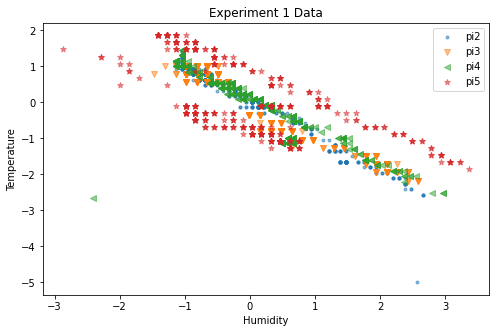

In [16]:
from visualising import visualise_experiment
visualise_experiment(node_data)

In [78]:
from modelling import select_model_data, grid_search_models
node = "pi3"
model_data = select_model_data(node_data, [node])
models, df = grid_search_models("lsvr", model_data, [node])

In [79]:
model = models[node]

In [80]:
epsilon = model.get_params()["epsilon"]

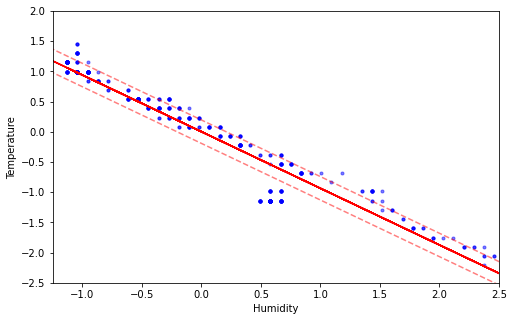

In [98]:
import matplotlib.pyplot as plt
single_node_data = std_samples[1][1][int(node[-1])-1]
plt.scatter(single_node_data.humidity, single_node_data.temperature, marker = ".", alpha=0.5, color = "b")
predictions = model.predict(single_node_data.humidity.values.reshape(-1,1))
plt.plot(single_node_data.humidity, predictions, color = "r")
min_humidity_index, max_humidity_index = single_node_data.humidity.argmin(), single_node_data.humidity.argmax()
epsilon_line_data_x = np.array([single_node_data.humidity.loc[min_humidity_index], 
                                single_node_data.humidity.loc[max_humidity_index]])
epsilon_line_data_y = np.array([predictions[min_humidity_index], predictions[max_humidity_index]])
plt.plot(epsilon_line_data_x + epsilon, epsilon_line_data_y + epsilon, color = "r", linestyle="--", alpha =0.5)
plt.plot(epsilon_line_data_x -epsilon, epsilon_line_data_y - epsilon, color = "r", linestyle="--", alpha =0.5, label = "e-tube")
plt.xlim([-1.25,2.5])
plt.ylim([-2.5,2])
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.savefig("results/figures/SVR_representation.jpg")

In [72]:
epsilon

0.2